# In this notebook, we have developed a model aimed at predicting flight delays. We utilized two different datasets from Microsoft, which are Flights Delay and Weather to see correlation between the two datasets and their impact on the flights delay. We have performed Data Cleaning, as well as Data Merging operations. In order to predict the outcome, we have used two different training models: Logistic Regression and Random Forest algorithm to see which model gives the best accuracy. 

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

# Read Weather Dataset.csv and replace empty space with NaN values.

In [2]:
weather_dataset = pd.read_csv('C:/Users/Sneha/Downloads/WeatherDataset.csv', low_memory=True)
print('Dataframe dimensions:', weather_dataset.shape)
weather_dataset=weather_dataset.replace(r'\s+',np.nan,regex=True)
#____________________________________________________________

weather_dataset.head()

Dataframe dimensions: (406516, 26)


,AirportID,Year,Month,Day,Time,TimeZone,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,ValueForWindCharacter,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter
0,14843,2013,4,1,56,-4,NaN,10.00,-RA,76,24.4,74,23.3,73,22.8,NaN,13,080,NaN,30.06,NaN,NaN,30.06,AA,NaN,30.07
1,14843,2013,4,1,156,-4,NaN,10.00,NaN,76,24.4,73,22.5,71,21.7,NaN,10,090,NaN,30.05,6,017,30.05,AA,NaN,30.06
2,14843,2013,4,1,256,-4,NaN,10.00,NaN,76,24.4,73,22.5,71,21.7,NaN,NaN,100,NaN,30.03,NaN,NaN,30.03,AA,NaN,30.04
3,14843,2013,4,1,356,-4,NaN,10.00,NaN,76,24.4,72,22.2,70,21.1,NaN,NaN,100,NaN,30.02,NaN,NaN,30.03,AA,NaN,30.03
4,14843,2013,4,1,456,-4,FEW025,10.00,NaN,76,24.4,72,22.2,70,21.1,NaN,NaN,110,NaN,30.03,5,004,30.04,AA,NaN,30.04


# We are checking the Data Types of each column within the Dataset and the percentage of NaN values.

In [3]:
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(weather_dataset.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(weather_dataset.isna().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(weather_dataset.isna().sum()/weather_dataset.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info


,AirportID,Year,Month,Day,Time,TimeZone,SkyCondition,Visibility,WeatherType,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,ValueForWindCharacter,StationPressure,PressureTendency,PressureChange,SeaLevelPressure,RecordType,HourlyPrecip,Altimeter
column type,int64,int64,int64,int64,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
null values (nb),0,0,0,0,0,0,209867,62687,368966,2397,0,0,0,22,0,397669,270774,11304,356997,0,390524,390524,0,0,391174,0
null values (%),0,0,0,0,0,0,51.6258,15.4205,90.763,0.589645,0,0,0,0.00541184,0,97.8237,66.6084,2.7807,87.8187,0,96.0661,96.0661,0,0,96.226,0


# The next step as part of the Data Cleaning is for each column that has more than 50% NaN values will be dropped. 

In [4]:
weather_dataset = weather_dataset.drop(['SkyCondition','WeatherType','RelativeHumidity','WindSpeed','ValueForWindCharacter','PressureTendency','PressureChange','HourlyPrecip'], axis=1)
weather_dataset.head()

,AirportID,Year,Month,Day,Time,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter
0,14843,2013,4,1,56,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07
1,14843,2013,4,1,156,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06
2,14843,2013,4,1,256,-4,10.00,76,24.4,73,22.5,71,21.7,100,30.03,30.03,AA,30.04
3,14843,2013,4,1,356,-4,10.00,76,24.4,72,22.2,70,21.1,100,30.02,30.03,AA,30.03
4,14843,2013,4,1,456,-4,10.00,76,24.4,72,22.2,70,21.1,110,30.03,30.04,AA,30.04


# In the Weather Dataset, the Time column is in UTC and in the Flights Delay Dataset, the Time column is in local timezone. Hence, we are writing the below function to convert the Time in the Weather Dataset into local timezone (utilizing the TimeZone column given next to it)

In [5]:
import math
import datetime
import time, pytz
from datetime import timedelta  
from dateutil.parser import parse
import time
def subtract_timezone_from_both(year, month, day, hour, time_zone):
    d = datetime.datetime.strptime(str(year)+"-"+str(month)+"-"+str(day)+" "+str(hour)+":00:00", "%Y-%m-%d %H:%M:%S",)
    local = pytz.timezone ("America/Chicago")
    local_dt = local.localize(d, is_dst=None)
    utc_dt = local_dt.astimezone(pytz.utc)
    utc_dt += timedelta(hours=time_zone)
    s = datetime.datetime.strftime(utc_dt,"%Y:%m:%d:%H:%M:%S")
    return pd.Series([int(x) for x in s.split(":")[0:4]],index=['Year','Month','Day','Time'])
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine=int(chaine)/100
        chaine = "{0:04d}".format(math.ceil(chaine)%24)
        heure = datetime.time(int(chaine))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_time():
    if pd.isnull(df['Date']) or pd.isnull(df['Time'])or pd.empty(df['Date']) or pd.isnull(df['Time']):
        return np.nan
    else:
        return datetime.datetime.combine(df['Date'],df['Time'])

In [6]:
#df['Time'].dtypes
weather_dataset.Time = weather_dataset.Time / 100
weather_dataset.Time = weather_dataset.Time.apply(lambda x: math.ceil(x)%24)

weather_dataset.loc[:, ['Year', 'Month', 'Day', 'Time']] = weather_dataset.apply(lambda row: subtract_timezone_from_both(row['Year'], row['Month'], row['Day'], row['Time'], row['TimeZone']),axis=1)
weather_dataset['Date'] = pd.to_datetime(weather_dataset[['Year','Month', 'Day']])
weather_dataset = weather_dataset.drop(['Year','Month','Day'], axis=1)
#__________________________________________________________________________
weather_dataset.head()

,AirportID,Time,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter,Date
0,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01
1,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01
2,14843,4,-4,10.00,76,24.4,73,22.5,71,21.7,100,30.03,30.03,AA,30.04,2013-04-01
3,14843,5,-4,10.00,76,24.4,72,22.2,70,21.1,100,30.02,30.03,AA,30.03,2013-04-01
4,14843,6,-4,10.00,76,24.4,72,22.2,70,21.1,110,30.03,30.04,AA,30.04,2013-04-01


# We are importing the Flights Delay dataset and replacing the empty space with NaN values.

In [7]:
flight_delay = pd.read_csv('C:/Users/Sneha/Downloads/FlightDelay.csv', low_memory=True)
print('Dataframe dimensions:', flight_delay.shape)
flight_delay=flight_delay.replace(r'\s+',np.nan,regex=True)
#____________________________________________________________

flight_delay.head()


Dataframe dimensions: (2719418, 14)


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0


# In the Flights Delay dataset, we are finding the Data Type for each column, checking the number and percentage of the NaN values.

In [8]:
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info1=pd.DataFrame(flight_delay.dtypes).T.rename(index={0:'column type'})
tab_info1=tab_info1.append(pd.DataFrame(flight_delay.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info1=tab_info1.append(pd.DataFrame(flight_delay.isnull().sum()/flight_delay.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info1

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
column type,int64,int64,int64,int64,object,int64,int64,int64,float64,float64,int64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,27444,27444,0,29033,0,0
null values (%),0,0,0,0,0,0,0,0,1.00919,1.00919,0,1.06762,0,0


# We are rounding off the Departure and Arrival Times to the nearest hour to have the maximum correlation with the Weather Dataset

In [9]:
flight_delay.CRSDepTime = flight_delay.CRSDepTime / 100
flight_delay.CRSDepTime = flight_delay.CRSDepTime.apply(lambda x: round(x))

In [10]:
flight_delay.CRSArrTime = flight_delay.CRSArrTime / 100
flight_delay.CRSArrTime = flight_delay.CRSArrTime.apply(lambda x: round(x))

# Since the percentage of NaN values is not significant compare to the entire dataset, we are dropping the NaN values. 

In [11]:
flight_delay.dropna(inplace = True)
flight_delay['Date']= pd.to_datetime(flight_delay.Year*10000+flight_delay.Month*100+flight_delay.DayofMonth,format='%Y%m%d')
flight_delay = flight_delay.drop(['Year','Month','DayofMonth'], axis=1)
flight_delay.head()

,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Date
0,5,DL,11433,13303,8,-3.0,0.0,11,1.0,0.0,0.0,2013-04-19
1,5,DL,14869,12478,17,0.0,0.0,23,-8.0,0.0,0.0,2013-04-19
2,5,DL,14057,14869,6,-4.0,0.0,9,-15.0,0.0,0.0,2013-04-19
3,5,DL,15016,11433,16,28.0,1.0,19,24.0,1.0,0.0,2013-04-19
4,5,DL,11193,12892,16,-6.0,0.0,18,-11.0,0.0,0.0,2013-04-19


# We are renaming the columns in order to make it easier to join the two datasets.

In [12]:
weather_dataset.rename(columns={'Time':'CRSDepTime','AirportID':'OriginAirportID'},inplace=True)
weather_dataset.head()

,OriginAirportID,CRSDepTime,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter,Date
0,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01
1,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01
2,14843,4,-4,10.00,76,24.4,73,22.5,71,21.7,100,30.03,30.03,AA,30.04,2013-04-01
3,14843,5,-4,10.00,76,24.4,72,22.2,70,21.1,100,30.02,30.03,AA,30.03,2013-04-01
4,14843,6,-4,10.00,76,24.4,72,22.2,70,21.1,110,30.03,30.04,AA,30.04,2013-04-01


In [13]:
temp_merge = pd.merge(weather_dataset,flight_delay,how='inner',on=['Date','OriginAirportID','CRSDepTime'])
temp_merge.dropna()
temp_merge.shape

(2851130, 25)

In [14]:
temp_merge.head()

,OriginAirportID,CRSDepTime,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter,Date,DayOfWeek,Carrier,DestAirportID,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01,1,B6,10721,0.0,0.0,6,-6.0,0.0,0.0
1,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01,1,B6,11697,5.0,0.0,6,5.0,0.0,0.0
2,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01,1,B6,12478,7.0,0.0,7,10.0,0.0,0.0
3,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01,1,B6,13204,-9.0,0.0,6,-11.0,0.0,0.0
4,14843,5,-4,10.00,76,24.4,72,22.2,70,21.1,100,30.02,30.03,AA,30.03,2013-04-01,1,B6,10721,10.0,0.0,9,-1.0,0.0,0.0


# We are plotting AirportID with respect to the delay to see if the Origin Airport affects the flight delay.

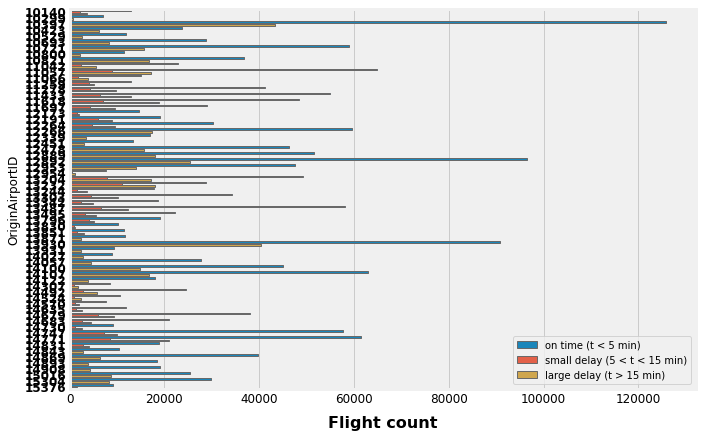

In [15]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 15]
temp_merge['DELAY_LEVEL'] = temp_merge['DepDelay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="OriginAirportID", hue='DELAY_LEVEL', data=temp_merge)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels


plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);

plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 15 min)')
L.get_texts()[2].set_text('large delay (t > 15 min)')
plt.show()

# Merging the Arrival Dataset with the Weather Dataset.

In [16]:
weather_dataset.rename(columns={'CRSDepTime':'CRSArrTime','OriginAirportID':'DestAirportID'},inplace=True)
weather_dataset.head()

,DestAirportID,CRSArrTime,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter,Date
0,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01
1,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01
2,14843,4,-4,10.00,76,24.4,73,22.5,71,21.7,100,30.03,30.03,AA,30.04,2013-04-01
3,14843,5,-4,10.00,76,24.4,72,22.2,70,21.1,100,30.02,30.03,AA,30.03,2013-04-01
4,14843,6,-4,10.00,76,24.4,72,22.2,70,21.1,110,30.03,30.04,AA,30.04,2013-04-01


In [17]:
temp2_merge = pd.merge(weather_dataset,flight_delay,how='inner',on=['Date','DestAirportID','CRSArrTime']).dropna()
temp2_merge.head()

,DestAirportID,CRSArrTime,TimeZone,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,WetBulbCelsius,DewPointFarenheit,DewPointCelsius,WindDirection,StationPressure,SeaLevelPressure,RecordType,Altimeter,Date,DayOfWeek,Carrier,OriginAirportID,CRSDepTime,DepDelay,DepDel15,ArrDelay,ArrDel15,Cancelled
0,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01,1,B6,11697,24,-10.0,0.0,-10.0,0.0,0.0
1,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01,1,B6,12478,22,0.0,0.0,-7.0,0.0,0.0
2,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01,1,B6,13204,23,-8.0,0.0,-10.0,0.0,0.0
3,14843,2,-4,10.00,76,24.4,74,23.3,73,22.8,080,30.06,30.06,AA,30.07,2013-04-01,1,B6,15304,23,-4.0,0.0,-11.0,0.0,0.0
4,14843,3,-4,10.00,76,24.4,73,22.5,71,21.7,090,30.05,30.05,AA,30.06,2013-04-01,1,B6,10721,24,18.0,1.0,45.0,1.0,0.0


In [18]:
temp2_merge.head()
temp2_merge.shape

(2288218, 25)

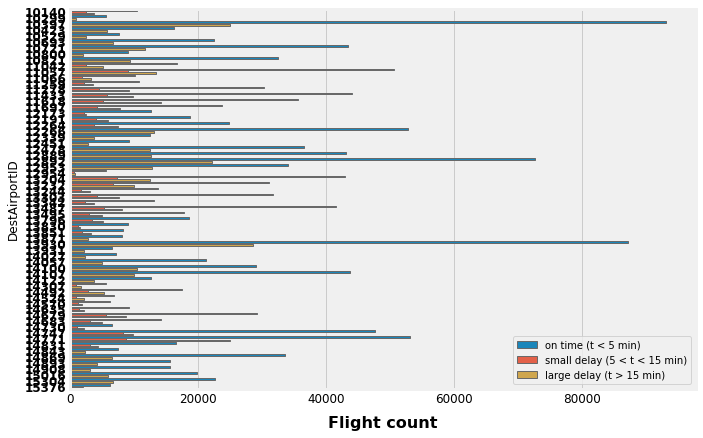

In [20]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 15]
temp2_merge['DELAY_LEVEL'] = temp2_merge['ArrDelay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="DestAirportID", hue='DELAY_LEVEL', data=temp2_merge)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels


plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);

plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 15 min)')
L.get_texts()[2].set_text('large delay (t > 15 min)')
plt.show()

In [28]:
merged_data=pd.concat([temp_merge, temp2_merge]).drop_duplicates().reset_index(drop=True)
merged_data.shape

(5118912, 26)

In [29]:
merged_data.drop(['TimeZone','RecordType','DayOfWeek','Date','Carrier','DELAY_LEVEL'], axis=1, inplace=True)

In [30]:
tabinfo=pd.DataFrame(merged_data.dtypes).T.rename(index={0:'column type'})
tabinfo

,Altimeter,ArrDel15,ArrDelay,CRSArrTime,CRSDepTime,Cancelled,DepDel15,DepDelay,DestAirportID,DewPointCelsius,DewPointFarenheit,DryBulbCelsius,DryBulbFarenheit,OriginAirportID,SeaLevelPressure,StationPressure,Visibility,WetBulbCelsius,WetBulbFarenheit,WindDirection
column type,object,float64,float64,int64,int64,float64,float64,float64,int64,object,object,object,object,int64,object,object,object,object,object,object


In [31]:
for column_num in (0,9,10,11,12,14,15,16,17,18,19):
    col = merged_data.columns[column_num]
    merged_data[col] = merged_data[col].convert_objects(convert_numeric=True).dropna()
    mask = merged_data[col].apply(lambda x: isinstance(x, (int, float)))
    merged_data[col] = merged_data[col].where(mask)
    merged_data[col]=merged_data[col].dropna()


In [32]:
tabinfo=pd.DataFrame(merged_data.dtypes).T.rename(index={0:'column type'})
tabinfo=tabinfo.append(pd.DataFrame(merged_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tabinfo=tabinfo.append(pd.DataFrame(merged_data.isnull().sum()/merged_data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))

tabinfo

,Altimeter,ArrDel15,ArrDelay,CRSArrTime,CRSDepTime,Cancelled,DepDel15,DepDelay,DestAirportID,DewPointCelsius,DewPointFarenheit,DryBulbCelsius,DryBulbFarenheit,OriginAirportID,SeaLevelPressure,StationPressure,Visibility,WetBulbCelsius,WetBulbFarenheit,WindDirection
column type,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
null values (nb),874,0,0,0,0,0,0,0,0,1572,1804,976,40095,0,646002,10656,428523,11480,11480,113629
null values (%),0.0170739,0,0,0,0,0,0,0,0,0.0307097,0.0352419,0.0190666,0.783272,0,12.6199,0.208169,8.37137,0.224266,0.224266,2.21979


# Generating the Heat Map to find corelation between the columns

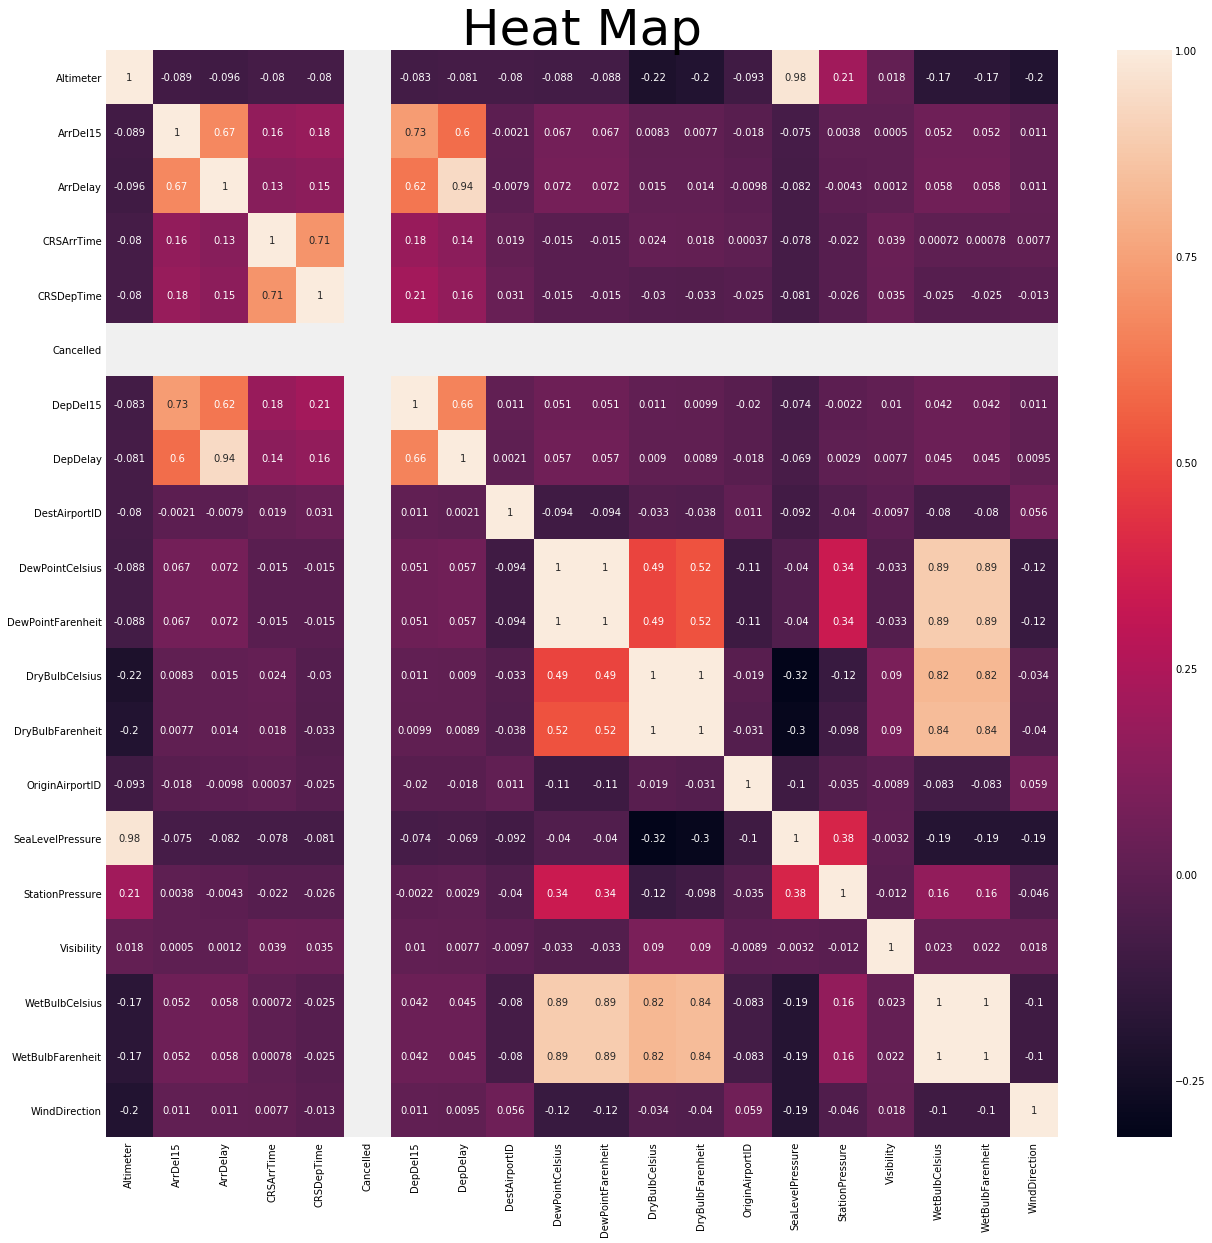

In [34]:
plt.figure(figsize=(19,20))
plt.title('Heat Map', size=50)
sns.heatmap(merged_data.corr(), annot=True)

In [35]:
merged_data.drop(['ArrDelay','Cancelled','DepDel15','DepDelay','DryBulbCelsius','WetBulbCelsius','DewPointCelsius'], axis=1, inplace=True)

# Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
merged_data.dropna(inplace=True)
X=merged_data[[col for col in merged_data.columns if col not in ['ArrDel15']]]
y=merged_data['ArrDel15']
X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.3,random_state = 42))

logisticRegr = LogisticRegression(C=100).fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print('Confusion Matrix')
print(cm)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logisticRegr.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logisticRegr.score(X_test, y_test)))

Confusion Matrix
[[981573      0]
 [249877      0]]
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


# ROC curve for Logistic Regression

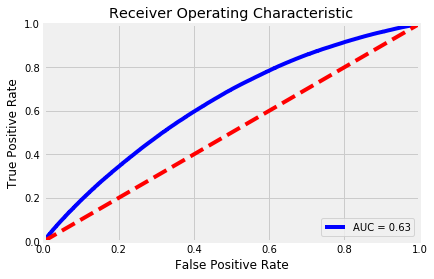

In [40]:
# calculate the fpr and tpr for all thresholds of the classification
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Algorithm

In [45]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify=merged_data['ArrDel15'])
randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=10)
randomForestClassifier.fit(x_train, y_train)
y_pred = randomForestClassifier.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(randomForestClassifier.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(randomForestClassifier.score(x_test, y_test)))

Confusion Matrix
[[1079242     900]
 [ 271521    2932]]
Accuracy of Random Forest classifier on training set: 0.80
Accuracy of Random Forest classifier on test set: 0.80


# ROC Curver for Random Forest Algorithm

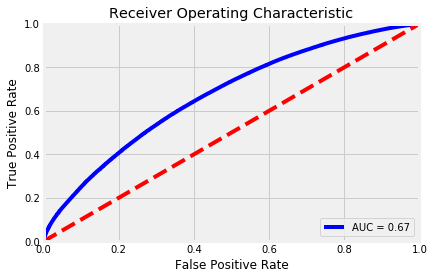

In [46]:
# calculate the fpr and tpr for all thresholds of the classification
probs = randomForestClassifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()